In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Original_data.csv')

In [3]:
df=df.drop(labels='Unnamed: 0',axis=1)

In [4]:
df.head(n=2)

,Patient ID,Diagnosis,Pathes
0,16014,1,archive/16014/1/16014_idx5_x951_y851_class1.png
1,16014,1,archive/16014/1/16014_idx5_x1201_y851_class1.png


<b>Non IDC patches</b>

In [5]:
df_non=df[df['Diagnosis']==0]

In [6]:
df_non.shape

(198738, 3)

In [7]:
df_non.head(n=2)

,Patient ID,Diagnosis,Pathes
209,16014,0,archive/16014/0/16014_idx5_x701_y1501_class0.png
210,16014,0,archive/16014/0/16014_idx5_x1251_y1501_class0.png


<b>IDC patches</b>

In [8]:
df_yes=df[df['Diagnosis']==1]

In [9]:
df_yes.shape

(78786, 3)

In [10]:
df_yes.head(n=2)

,Patient ID,Diagnosis,Pathes
0,16014,1,archive/16014/1/16014_idx5_x951_y851_class1.png
1,16014,1,archive/16014/1/16014_idx5_x1201_y851_class1.png


<b>dataset creation</b>

<b>from here to</b>

In [11]:
import random

In [12]:
index=random.sample(range(0,len(df_yes)),5000)
df_yes=df_yes.iloc[index]


In [13]:
df_yes.shape

(5000, 3)

In [14]:
df_yes.head(n=2)

,Patient ID,Diagnosis,Pathes
45637,16534,1,archive/16534/1/16534_idx5_x251_y201_class1.png
174483,14190,1,archive/14190/1/14190_idx5_x1951_y1701_class1.png


<b>till here</b>

<p style="color:yellow">selecting equal non-IDC patches</p>

In [15]:
import random

In [16]:
index=random.sample(range(0,len(df_non)),len(df_yes))
df_no=df_non.iloc[index]


In [17]:
df_no.shape

(5000, 3)

In [18]:
df_no.head(n=2)

,Patient ID,Diagnosis,Pathes
243729,9041,0,archive/9041/0/9041_idx5_x2701_y2251_class0.png
114069,15839,0,archive/15839/0/15839_idx5_x1201_y1151_class0.png


In [19]:
df=df_yes.append(df_no)

In [20]:
df.shape

(10000, 3)

In [21]:
from sklearn.utils import shuffle

In [22]:
df = shuffle(df,random_state=8).reset_index(drop=True)


In [23]:
df.head(n=2)

,Patient ID,Diagnosis,Pathes
0,9126,1,archive/9126/1/9126_idx5_x1901_y1951_class1.png
1,9043,1,archive/9043/1/9043_idx5_x3351_y651_class1.png


In [24]:
df["Diagnosis"].value_counts()

0    5000
1    5000
Name: Diagnosis, dtype: int64

In [25]:
df.to_csv('dataset_ten.csv')

<b>image augmentation for IDC patches. can't do because of the lack of hardware</b>

<b style="color:red">
    dataset.csv
    <br><br>
    
    IDC=2500
    Non-IDC=2500
</b>

<b>nothing here</b>

In [11]:
from skimage import transform
import numpy as np
from PIL.Image import open
import matplotlib.pyplot as plt

In [12]:
sample_image=df_yes['Pathes'].map(lambda x:np.asarray(open(x).resize((128,128))))

In [13]:
sample_image.shape

(78786,)

In [14]:
type(sample_image)

pandas.core.series.Series

<b>sample_image[pandas.series]->sample_img[numpy.ndarray]. so that augmented images can be added</b>

In [15]:
sample_img=np.array(sample_image)

<b>all the augmented images are in list x</b>

In [16]:
x=[]

In [ ]:
for i in range(len(sample_image)):
    transformed_image=transform.rotate(
        sample_img[i],
        angle=90
    )
    x.append(transformed_image)

In [48]:
df_yes.append(sample_image,ignore_index=True)

MemoryError: Unable to allocate 46.2 GiB for an array with shape (78786, 78786) and data type float64

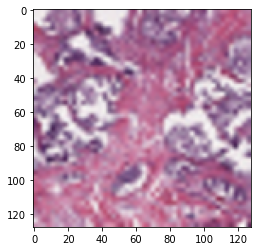

In [39]:
plt.imshow(sample_image[0])

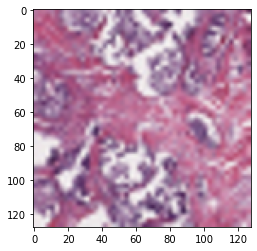

In [40]:
plt.imshow(transformed_image)